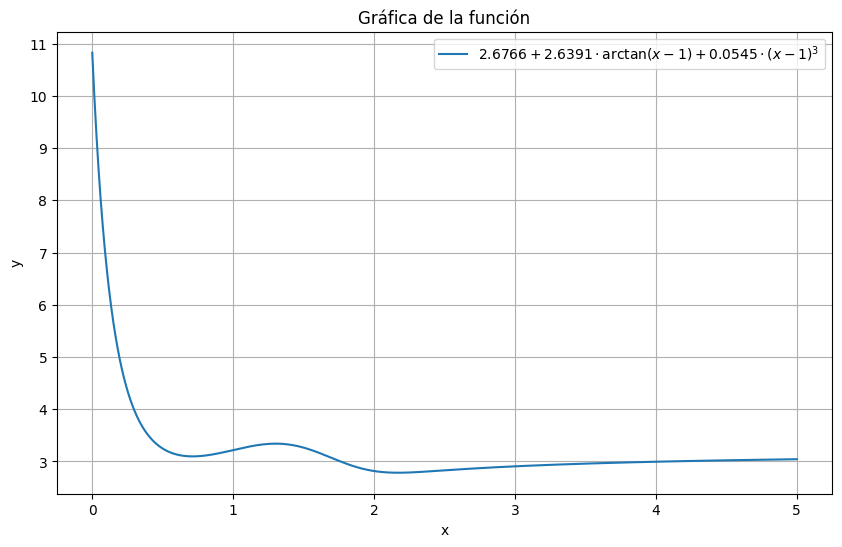

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def modelo_fisico(x):
    return 2.2174715995788574 + 0.6225882172584534 * np.arctan(x - 1) + 0.10990084707736969** (x - 1)**3

# Valores de x de 0 a 5
x_values = np.linspace(0, 5, 1000)
y_values = modelo_fisico(x_values)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$2.6766 + 2.6391 \cdot \arctan(x - 1) + 0.0545 \cdot (x - 1)^3$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la función')
plt.legend()
plt.grid()
plt.show()


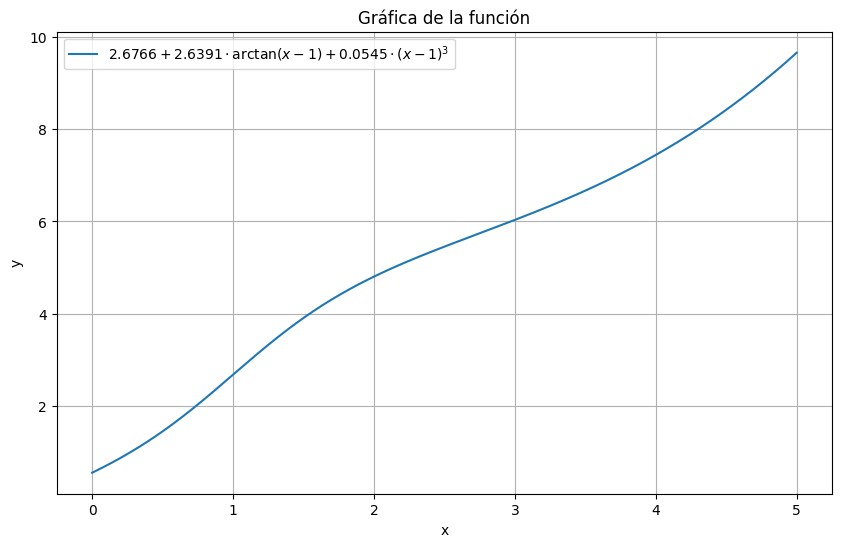

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def modelo_fisico(x):
    return 2.676626682281494 + 2.6390979290008545 * np.arctan(x - 1) + 0.05445805564522743 * (x - 1) ** 3

# Valores de x de 0 a 5
x_values = np.linspace(0, 5, 1000)
y_values = modelo_fisico(x_values)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$2.6766 + 2.6391 \cdot \arctan(x - 1) + 0.0545 \cdot (x - 1)^3$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la función')
plt.legend()
plt.grid()
plt.show()


C:\Users\carlo\AppData\Local\Temp\ipykernel_3544\2507248641.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'signal_{tamaño}.txt', delim_whitespace=True, header=None, names=['muestra1', 'muestra2'])


99 20594.046875
199 20161.173828125
299 19820.796875
399 19551.9296875
499 19338.58203125
599 19168.53125
699 19032.390625
799 18922.9296875
899 18834.55859375
999 18762.927734375
Resultado: y = 2.2803871631622314 + 1.827793836593628 arctan(x - 1) + 0.07187357544898987 (x - 1)^3


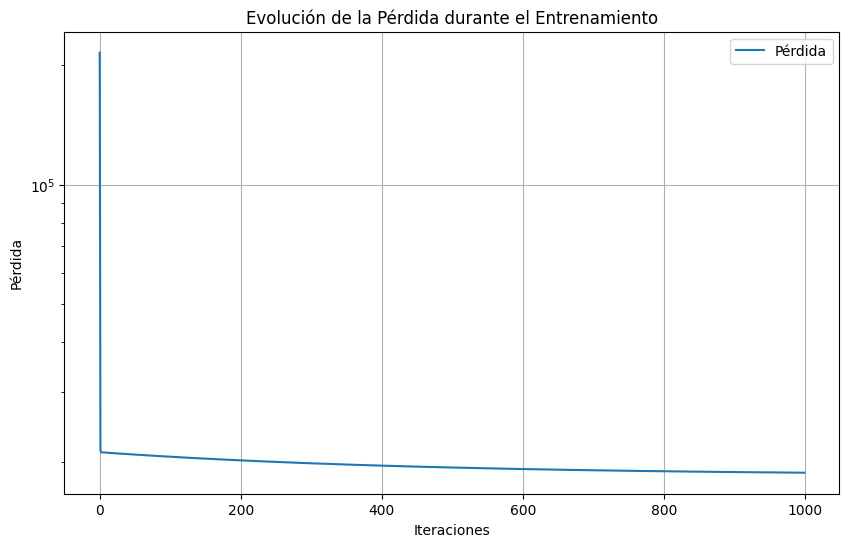

In [55]:
import torch
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dtype = torch.float
device = torch.device("cuda")  # Use GPU
tamaño=1000

df = pd.read_csv(f'signal_{tamaño}.txt', delim_whitespace=True, header=None, names=['muestra1', 'muestra2'])
y = torch.tensor(df['muestra1'].values, device=device, dtype=dtype)


x = torch.linspace(-math.pi, math.pi, tamaño, device=device, dtype=dtype)
a_1, a_2, a_3 = [torch.randn((), device=device, dtype=dtype) for _ in range(3)]

learning_rate = 1e-6
perdidas = []
for t in range(tamaño):
    modelo_fisico = a_1 + a_2 * torch.atan(x - 1) + a_3 * (x - 1)**3
    loss = (modelo_fisico - y).pow(2).sum().item()
    perdidas.append(loss)
    if t % 100 == 99:
        print(t, loss)
    
    grad_y_pred = 2.0 * (modelo_fisico - y)
    grad_a_1 = grad_y_pred.sum()
    grad_a_2 = (grad_y_pred * torch.atan(x - 1)).sum()
    grad_a_3 = (grad_y_pred * ((x - 1)**3)).sum()
    
    a_1 -= learning_rate * grad_a_1
    a_2 -= learning_rate * grad_a_2
    a_3 -= learning_rate * grad_a_3

print(f'Resultado: y = {a_1.item()} + {a_2.item()} arctan(x - 1) + {a_3.item()} (x - 1)^3')

plt.figure(figsize=(10, 6))
plt.plot(perdidas, label='Pérdida')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

#METODO NEWTON RAPHSON




In [37]:
import torch
import math
import numpy as np


dtype = torch.float
# device = torch.device("cpu")  # Dispositivo para ejecutar en CPU
device = torch.device("cuda") # Descomenta esto para ejecutar en GPU

# Crear datos de entrada y salida aleatorios
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
print(y)
# Inicializar pesos aleatoriamente
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(len(x)):
    # Paso hacia adelante: calcular y predicho
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Calcular y mostrar la pérdida (loss)
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Retropropagar para calcular los gradientes de a, b, c, d con respecto a la pérdida
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Actualizar pesos utilizando descenso de gradiente
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Resultado: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1430e-03, -8.7423e-08], device='cuda:0')
99 2713.556640625
199 1798.052978515625
299 1192.463623046875
399 791.8673706054688
499 526.8666381835938
599 351.5595703125
699 235.58447265625
799 158.858154296875
899 108.09637451171875
999 74.51123046875
1099 52.289825439453125
1199 37.586395263671875
1299 27.85696792602539
1399 21.418716430664062
1499 17.158069610595703
1599 14.338314056396484
1699 12.472086906433105
1799 11.236847877502441
1899 10.419201850891113
1999 9.877948760986328
Resultado: y = -0.004954714328050613 + 0.8254089951515198 x + 0.0008547735051251948 x^2 + -0.08887370675802231 x^3
